<a href="https://colab.research.google.com/github/kenanmorani/pattern_recognition_idu/blob/main/PCA%26LDA_on_IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The code builds two classes; a Principle Component Analysis (PCA) class and an Linear Discriminant Analysis (LDA) class aiming at demontionality reduction.
* The code applies the two mdethods on the popular 'iris' dataset.


In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Loading the IRIS dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Bulding PCA class

In [3]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance
        cov = np.cov(X.T)
        # eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # sorting eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # storing the first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # projecting the data
        X = X - self.mean
        return np.dot(X, self.components.T)

# Applying PCA to IRIS dataset

In [4]:
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_r1 = pca.transform(X)

In [5]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_r1.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


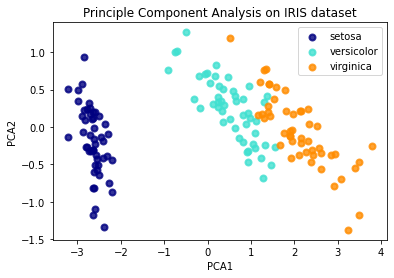

In [6]:
# Plotting the results of applying PCA on IRIS dataset
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r1[y == i, 0], X_r1[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Principle Component Analysis on IRIS dataset')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# Building LDA class

In [7]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determining SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Geting eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # sorting eigenvalues
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # storing first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # projecting the data
        return np.dot(X, self.linear_discriminants.T)

# Applying LDA to IRIS Dataset

In [8]:
# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_r2 = lda.transform(X)

In [9]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_r2.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


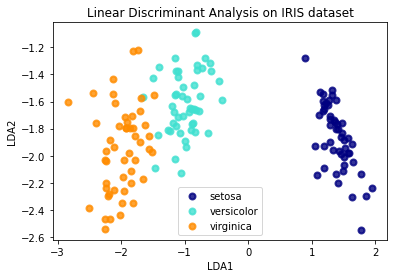

In [10]:
# Plotting the results of applying LDA on IRIS dataset
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Linear Discriminant Analysis on IRIS dataset')
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()